In [17]:
import gdown
import zipfile
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [18]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [19]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=c567f6f8-3b73-423e-9476-7ffc42ae6411
To: /kaggle/working/garbage.zip
100%|██████████| 133M/133M [00:00<00:00, 247MB/s] 


'garbage.zip'

In [20]:
zip_path = "/kaggle/working/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [21]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/kaggle/working/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)

All images are in the specified formats.


In [22]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

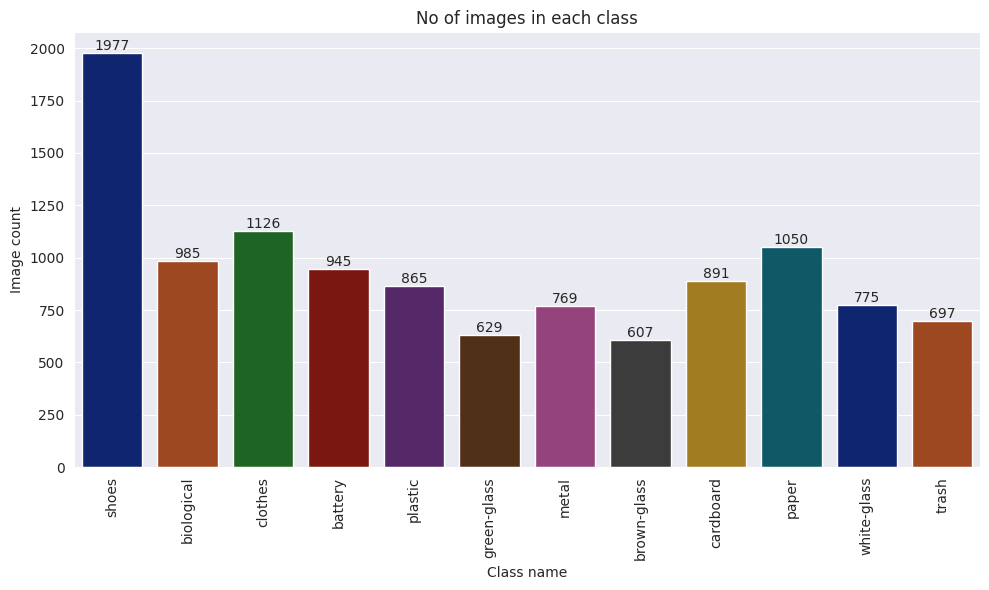

In [23]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
import random

base_path = "/kaggle/working/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")

Deleted 1277 images in shoes
Deleted 285 images in biological
Deleted 426 images in clothes
Deleted 245 images in battery
Deleted 165 images in plastic
No deletion needed in green-glass
Deleted 69 images in metal
No deletion needed in brown-glass
Deleted 191 images in cardboard
Deleted 350 images in paper
Deleted 75 images in white-glass
No deletion needed in trash


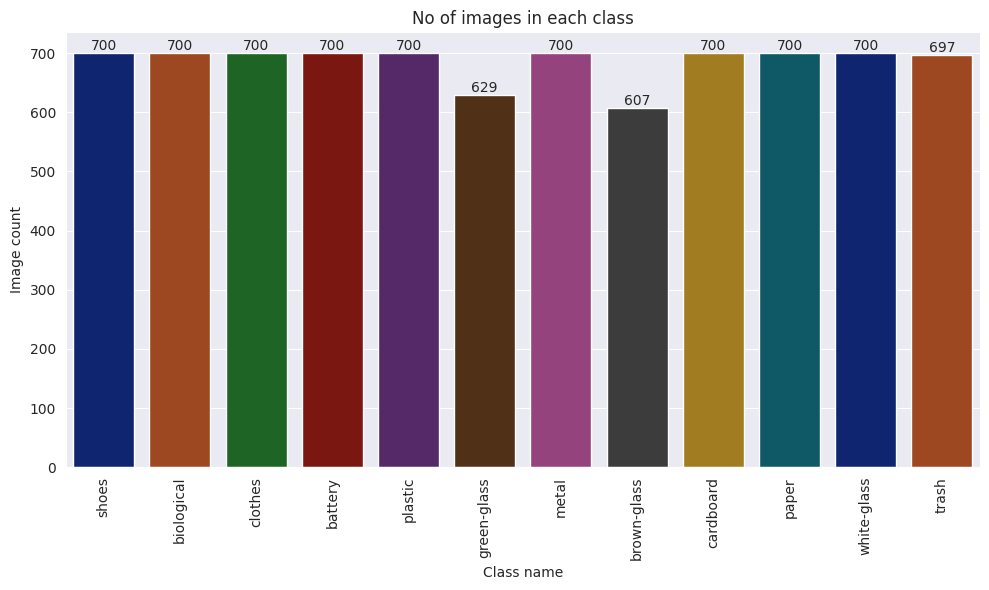

In [25]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
import os
import random
import pandas as pd

# Define garbage classes with gas emission ranges
garbage_classes = {
    "battery":       {"CH4": (1, 3), "CO2": (550, 650), "CO": (1, 3), "H2S": (0.02, 0.05), "VOCs": (2, 6), "NH3": (0.001, 0.003), "Odor": (3, 5)},
    "biological":    {"CH4": (200, 350), "CO2": (1200, 1600), "CO": (15, 30), "H2S": (0.4, 0.7), "VOCs": (12, 20), "NH3": (0.2, 0.35), "Odor": (8, 9)},
    "brown-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "cardboard":     {"CH4": (2, 4), "CO2": (500, 600), "CO": (2, 4), "H2S": (0.002, 0.006), "VOCs": (0.5, 1), "NH3": (0.001, 0.003), "Odor": (2, 3)},
    "clothes":       {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "green-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "metal":         {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "paper":         {"CH4": (1, 3), "CO2": (500, 600), "CO": (1, 3), "H2S": (0.001, 0.004), "VOCs": (0.3, 0.7), "NH3": (0, 0.002), "Odor": (1, 2)},
    "plastic":       {"CH4": (3, 6), "CO2": (600, 800), "CO": (4, 7), "H2S": (0.002, 0.006), "VOCs": (6, 12), "NH3": (0.001, 0.003), "Odor": (3, 4)},
    "shoes":         {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "trash":         {"CH4": (10, 20), "CO2": (700, 900), "CO": (8, 12), "H2S": (0.05, 0.1), "VOCs": (4, 8), "NH3": (0.01, 0.02), "Odor": (5, 6)},
    "white-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
}

# Biodegradable and Non-biodegradable mapping
biodegradable = {"biological", "cardboard", "clothes", "paper", "shoes", "trash"}
non_biodegradable = {"battery", "brown-glass", "green-glass", "metal", "plastic", "white-glass"}

dataset_path = "/kaggle/working/garbage"
data = []

# Generate synthetic sensor data
for category, ranges in garbage_classes.items():
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(category_path, img_file)

                # Assign class as Biodegradable or Non-Biodegradable
                waste_type = "biodegradable" if category in biodegradable else "non-biodegradable"

                sensor_values = {gas: round(random.uniform(*range_val), 3) for gas, range_val in ranges.items()}

                data.append({"image_path": img_path, "label": waste_type, **sensor_values})

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("garbage_sensor_data_bio_vs_nonbio.csv", index=False)

print("Dataset saved as garbage_sensor_data_bio_vs_nonbio.csv")


Dataset saved as garbage_sensor_data_bio_vs_nonbio.csv


In [27]:
path = "/kaggle/working/garbage_sensor_data_bio_vs_nonbio.csv"
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,image_path,label,CH4,CO2,CO,H2S,VOCs,NH3,Odor
0,/kaggle/working/garbage/battery/battery239.jpg,non-biodegradable,1.828,633.645,2.958,0.036,5.525,0.002,3.336
1,/kaggle/working/garbage/battery/battery907.jpg,non-biodegradable,1.895,601.247,1.135,0.026,4.556,0.003,3.048
2,/kaggle/working/garbage/battery/battery766.jpg,non-biodegradable,2.171,605.472,2.601,0.047,3.632,0.002,4.998
3,/kaggle/working/garbage/battery/battery350.jpg,non-biodegradable,2.262,586.948,2.487,0.032,3.706,0.002,4.173
4,/kaggle/working/garbage/battery/battery137.jpg,non-biodegradable,2.678,581.740,2.553,0.046,4.911,0.002,3.206
...,...,...,...,...,...,...,...,...,...
8228,/kaggle/working/garbage/white-glass/white-glas...,non-biodegradable,0.000,481.236,0.000,0.000,0.000,0.000,0.000
8229,/kaggle/working/garbage/white-glass/white-glas...,non-biodegradable,0.000,511.652,0.000,0.000,0.000,0.000,0.000
8230,/kaggle/working/garbage/white-glass/white-glas...,non-biodegradable,0.000,516.586,0.000,0.000,0.000,0.000,0.000
8231,/kaggle/working/garbage/white-glass/white-glas...,non-biodegradable,0.000,511.203,0.000,0.000,0.000,0.000,0.000


In [28]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']] = scaling.fit_transform(data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']])

In [29]:
train_df = data.sample(frac=1,random_state=0).iloc[:6000]
val_df = data.sample(frac=1,random_state=0).iloc[6000:7500]
test_df = data.sample(frac=1,random_state=0).iloc[7500:]

print("training data: ", train_df.shape)
print("validation data: ", val_df.shape)
print("testing data: ", test_df.shape)


training data:  (6000, 9)
validation data:  (1500, 9)
testing data:  (733, 9)


In [30]:
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB7
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model


class MultiModalDataGenerator(Sequence):
    def __init__(self, df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=None):
        self.df = df
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augmentor = augmentor
        self.indices = np.arange(len(df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[batch_indices]
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        batch_size = len(batch_df)
        image_batch = np.zeros((batch_size, *self.img_size, 3), dtype=np.float32)
        gas_batch = np.zeros((batch_size, 7), dtype=np.float32)

        label_mapping = {
            "non-biodegradable" : 0,
            "biodegradable"  : 1
        }
        num_classes = len(label_mapping)
        labels = np.zeros((batch_size, num_classes), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            img = cv2.imread(row.image_path)
            if img is None:
                print("Error reading image:", row.image_path)
                continue
            img = cv2.resize(img, self.img_size)
            img = img.astype(np.float32) / 255.0
            if self.augmentor is not None:
                img = self.augmentor.random_transform(img)
            image_batch[i] = img

            gas_values = [row.CH4, row.CO2, row.CO, row.H2S, row.VOCs, row.NH3, row.Odor]
            gas_batch[i] = np.array(gas_values, dtype=np.float32)

            label_idx = label_mapping.get(row.label)
            if label_idx is not None:
                labels[i, label_idx] = 1

        return ((image_batch, gas_batch), labels)


augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = MultiModalDataGenerator(train_df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=augmentor)
val_generator   = MultiModalDataGenerator(val_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)
test_generator  = MultiModalDataGenerator(test_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)



image_input = Input(shape=(224,224,3), name='image_input')
# Xception
xception = Xception(include_top=False, input_tensor=image_input)
xception.trainable = False
x = xception.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

gas_input = Input(shape=(7,), name='gas_input')
y = Dense(32, activation='relu')(gas_input)
y = BatchNormalization()(y)
y = Dense(64, activation='relu')(y)
y = BatchNormalization()(y)

combined = Concatenate()([x, y])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
output = Dense(2, activation='sigmoid', name='output')(z)

model = Model(inputs=[image_input, gas_input], outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6

 Total params: 72,319,082 (275.88 MB)

 Trainable params: 51,457,410 (196.29 MB)

 Non-trainable params: 20,861,672 (79.58 MB)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=callback
)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 73s 338ms/step - accuracy: 0.8233 - loss: 0.4914 - val_accuracy: 0.9504 - val_loss: 0.1329
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 326ms/step - accuracy: 0.9635 - loss: 0.1303 - val_accuracy: 0.9762 - val_loss: 0.0735
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 323ms/step - accuracy: 0.9785 - loss: 0.0861 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 324ms/step - accuracy: 0.9852 - loss: 0.0552 - val_accuracy: 0.9959 - val_loss: 0.0183
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 325ms/step - accuracy: 0.9931 - loss: 0.0348 - val_accuracy: 0.9973 - val_loss: 0.0124
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 324ms/step - accuracy: 0.9967 - loss: 0.0241 - val_accuracy: 0.9986 - val_loss: 0.0077
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 328ms/step - accuracy: 0.9984 - loss: 0.0169 - val_accuracy: 0.9980 - val_loss: 0.0079
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 324ms/step - accuracy: 0.9959 -

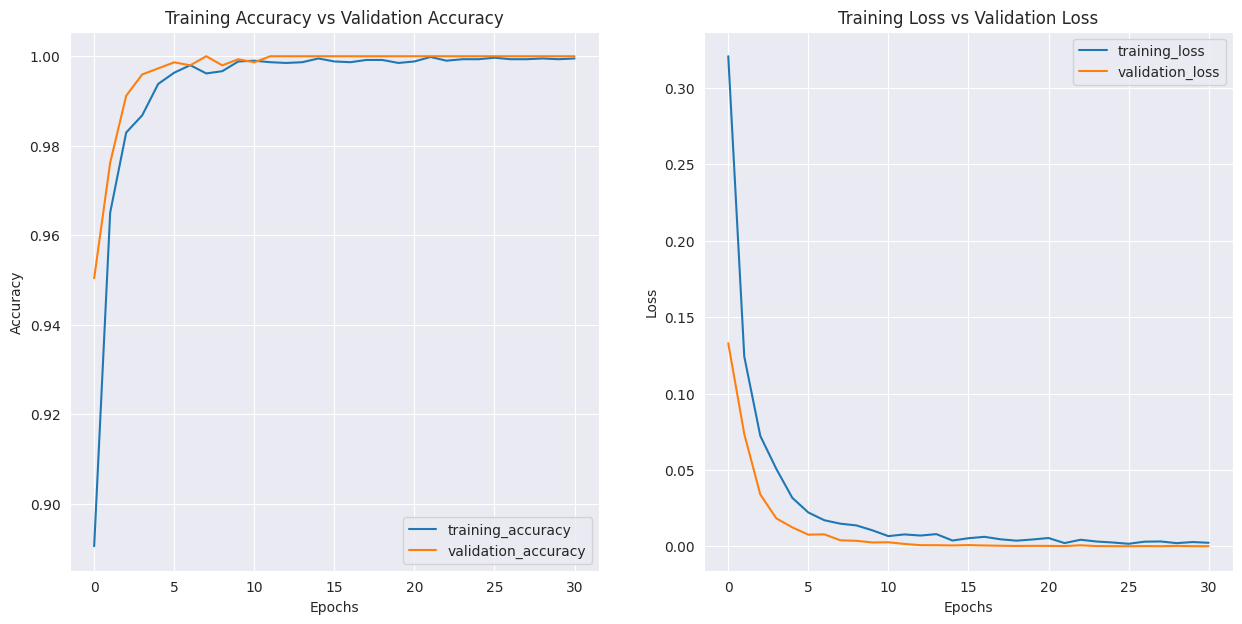

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(history.history['accuracy'],label='training_accuracy')
ax[0].plot(history.history['val_accuracy'],label='validation_accuracy')
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history.history['loss'],label='training_loss')
ax[1].plot(history.history['val_loss'],label='validation_loss')
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [33]:
model.save("Garbage_Segregation_Xception_Model_bio_nonbio.h5")
print("Model Saved !!!")

Model Saved !!!


In [34]:
model.save_weights("Garbage_Segregation_Xception_Weights.weights.h5")
print("Weights saved !!!")

Weights saved !!!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


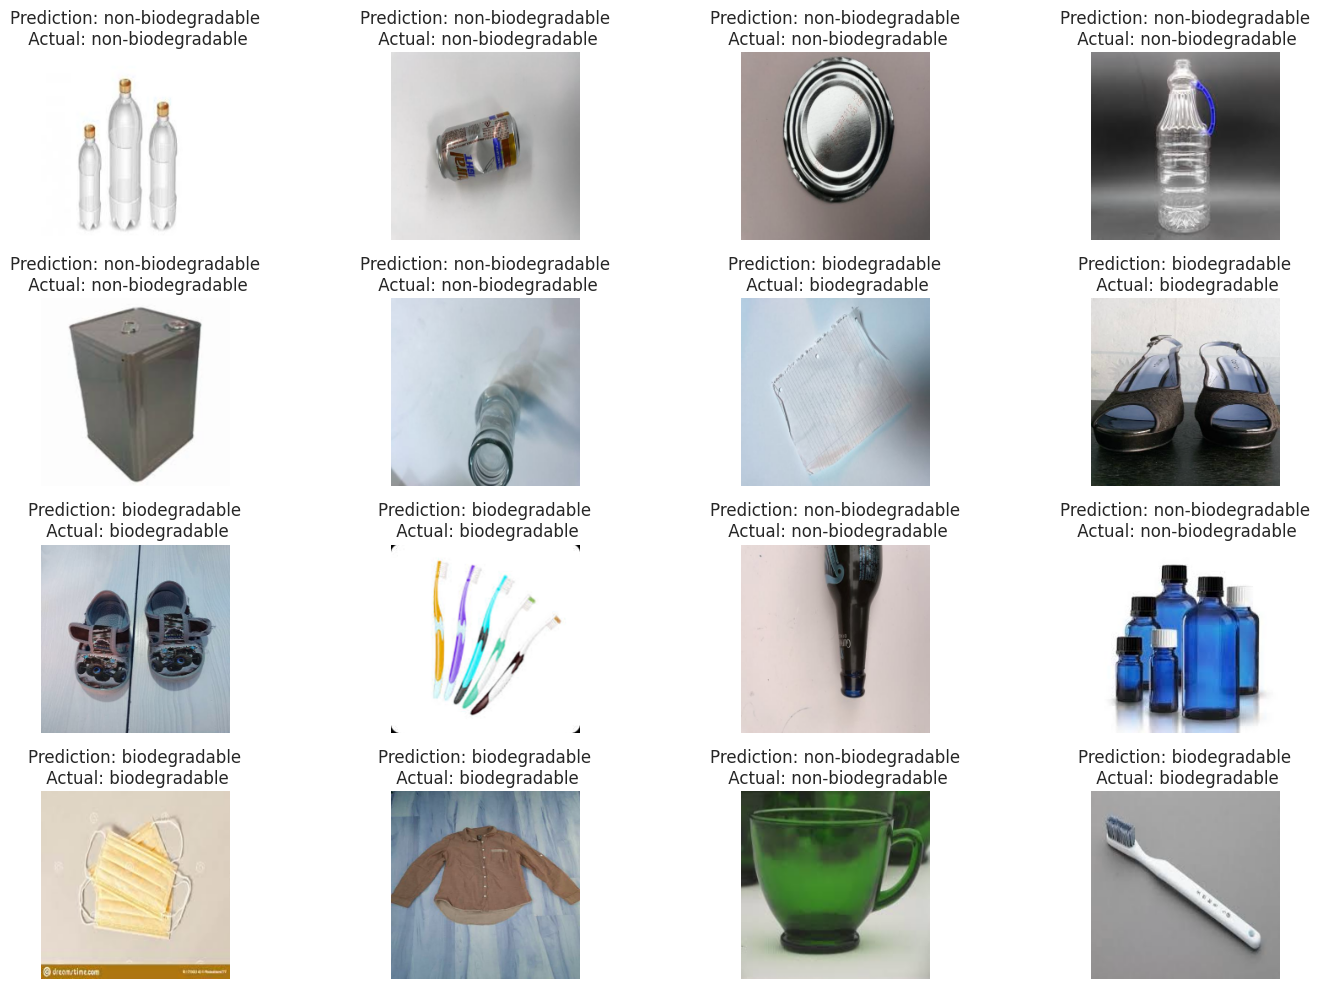

In [39]:
from tensorflow.keras.models import load_model

(image_batch, gas_batch), labels = test_generator[1]

Xception = load_model("/kaggle/working/Garbage_Segregation_Xception_Model_bio_nonbio.h5")

pred_probs = Xception.predict((image_batch, gas_batch))
predicted_class = np.argmax(pred_probs, axis=1)

true_class = np.argmax(labels, axis=1)

class_names = ["non-biodegradable","biodegradable"]

fig, axes = plt.subplots(4,4, figsize=(15, 10))
axes = axes.flatten()

for i in range(16):
    img = (image_batch[i] * 255).astype('uint8')
    axes[i].imshow(img)

    pred_label = class_names[predicted_class[i]]
    true_label = class_names[true_class[i]]

    axes[i].set_title(f"Prediction: {pred_label}\n Actual: {true_label}")
    axes[i].axis("off")


plt.tight_layout()
plt.show()